In [1]:
import pandas as pd

In [2]:
# Specify the path to the datasets
path = r'C:\Users\Lekhansh\Downloads'

# Load datasets
content_df = pd.read_csv(f'{path}\content.csv')
reactions_df = pd.read_csv(f'{path}\\reactions.csv')
reaction_types_df = pd.read_csv(f'{path}\\reactiontypes.csv')

In [10]:
# Inspect the data
print(content_df.head())
print(reactions_df.head())
print(reaction_types_df.head())

   Unnamed: 0                            Content ID  \
0           0  97522e57-d9ab-4bd6-97bf-c24d952602d2   
1           1  9f737e0a-3cdd-4d29-9d24-753f4e3be810   
2           2  230c4e4d-70c3-461d-b42c-ec09396efb3f   
3           3  356fff80-da4d-4785-9f43-bc1261031dc6   
4           4  01ab84dd-6364-4236-abbb-3f237db77180   

                                User ID   Type        Category  \
0  8d3cd87d-8a31-4935-9a4f-b319bfe05f31  photo        Studying   
1  beb1f34e-7870-46d6-9fc7-2e12eb83ce43  photo  healthy eating   
2  a5c65404-5894-4b87-82f2-d787cbee86b4  photo  healthy eating   
3  9fb4ce88-fac1-406c-8544-1a899cee7aaf  photo      technology   
4  e206e31b-5f85-4964-b6ea-d7ee5324def1  video            food   

                                                 URL  
0  https://socialbuzz.cdn.com/content/storage/975...  
1  https://socialbuzz.cdn.com/content/storage/9f7...  
2  https://socialbuzz.cdn.com/content/storage/230...  
3  https://socialbuzz.cdn.com/content/storage/356...

In [3]:
# Data Cleaning for content_df
content_df.dropna(inplace=True)
content_df = content_df[['Content ID', 'Type', 'Category']]
content_df.head()

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [4]:
# Data Cleaning for reaction_df
reactions_df.dropna(inplace=True)
reactions_df = reactions_df[['Content ID', 'Type', 'Datetime']]
reactions_df.head()

,Content ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [5]:
# Data Cleaning for reaction_types_df
reaction_types_df.dropna(inplace=True)
reaction_types_df = reaction_types_df[['Type', 'Score']]
reaction_types_df['Score'] = reaction_types_df['Score'].astype(float)

In [6]:
# Merge reaction_df with reaction_types_df on 'Type'
reaction_with_scores = pd.merge(reactions_df, reaction_types_df, on='Type')

In [7]:
# Merge the resulting dataframe with content_df on 'Content ID'
merged_df = pd.merge(content_df, reaction_with_scores, on='Content ID')

In [8]:
merged_df.head()

,Content ID,Type_x,Category,Type_y,Datetime,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,0.0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,0.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-04-09 02:46:20,0.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,2021-06-17 12:22:51,10.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,2020-11-09 02:49:59,10.0


In [9]:
# Calculate the total reaction score for each category
category_scores = merged_df.groupby('Category')['Score'].sum().reset_index()

In [10]:
# Sort categories by total reaction score in descending order and get the top 5
top_categories = category_scores.sort_values(by='Score', ascending=False).head(5)

# Output the results with the top 5 categories with the highest score
print(top_categories)

          Category    Score
15          travel  53935.0
10         science  53657.0
8   healthy eating  52745.0
1          animals  52443.0
2          cooking  49681.0


In [11]:
# Define the path for the output file
output_file_path = r'C:\Users\Lekhansh\Downloads\top_categories.xlsx'

In [24]:
# Save the cleaned dataset and top 5 categories to an Excel file
with pd.ExcelWriter(output_file_path) as writer:
    merged_df.to_excel(writer, sheet_name='Cleaned Dataset', index=False)
    top_categories.to_excel(writer, sheet_name='Top 5 Categories', index=False)

print(f"File saved successfully at {output_file_path}")


File saved successfully at C:\Users\Lekhansh\Downloads\top_categories.xlsx


In [12]:
import matplotlib.pyplot as plt


In [13]:
# 1. Unique Categories
unique_categories = merged_df['Category'].nunique()
print(f"Number of unique categories: {unique_categories}")


Number of unique categories: 17


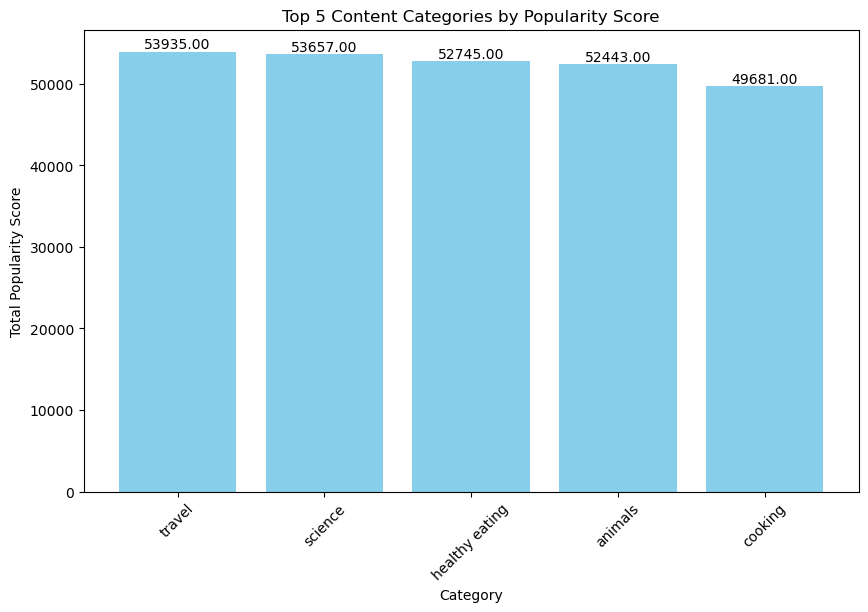

In [14]:
# 1. Bar Chart: Top 5 Content Categories
plt.figure(figsize=(10, 6))
bars = plt.bar(top_categories['Category'], top_categories['Score'], color='skyblue')
plt.title('Top 5 Content Categories by Popularity Score')
plt.xlabel('Category')
plt.ylabel('Total Popularity Score')
plt.xticks(rotation=45)

# Add total scores above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )

plt.savefig('top_5_categories.png')
plt.show()


In [15]:
# 3. Reactions to the Most Popular Category
most_popular_category = top_categories.iloc[0]['Category']
reactions_to_most_popular = merged_df[merged_df['Category'] == most_popular_category].shape[0]
print(f"Number of reactions to the most popular category ({most_popular_category}): {reactions_to_most_popular}")


Number of reactions to the most popular category (travel): 1368


Month with the most posts: 2020-08 with 1612 posts


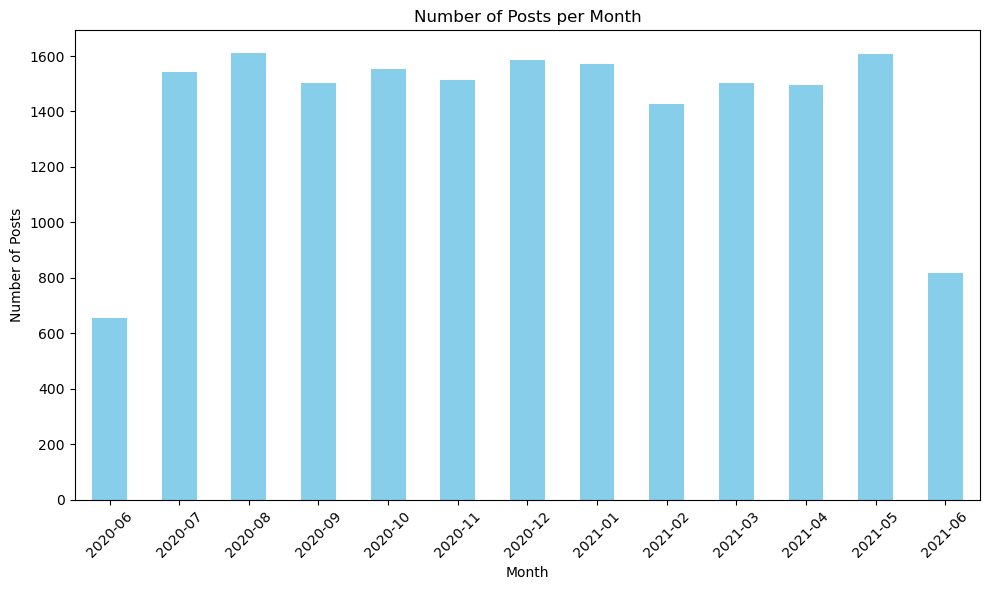

In [16]:
# Convert Datetime column to datetime format
merged_df['Datetime'] = pd.to_datetime(merged_df['Datetime'])

# Extract month from Datetime
merged_df['Month'] = merged_df['Datetime'].dt.to_period('M')

# Count posts per month
posts_per_month = merged_df['Month'].value_counts().sort_index()

# Identify the month with the most posts
max_posts_month = posts_per_month.idxmax()
max_posts_count = posts_per_month.max()

print(f"Month with the most posts: {max_posts_month} with {max_posts_count} posts")

# Plotting the bar chart (optional)
plt.figure(figsize=(10, 6))
posts_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Posts per Month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


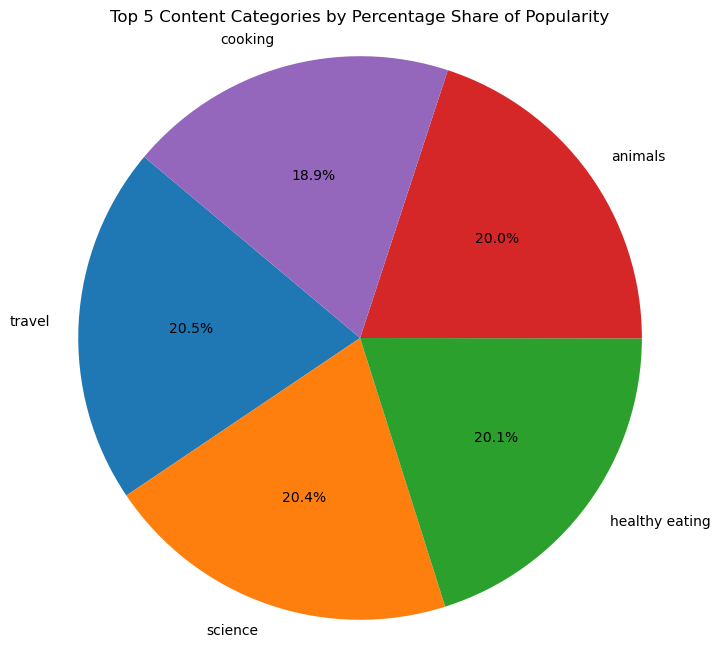

In [17]:
# Calculate total score
total_score = top_categories['Score'].sum()

# Calculate percentage share
top_categories['Percentage'] = (top_categories['Score'] / total_score) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_categories['Score'], labels=top_categories['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Content Categories by Percentage Share of Popularity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('top_5_categories_pie_chart.png')
plt.show()